# <center> Практика. Статистические тесты в контексте EDA
# <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

### Описание столбцов:

| Наименование столбца | Описание |
| -------------------- | -------- |
| work_year | Год, в котором была выплачена зарплата. |
| experience_level | Опыт работы на этой должности в течение года со следующими возможными значениями: EN — Entry-level/Junior; MI — Mid-level/Intermediate; SE — Senior-level/Expert; EX — Executive-level/Director. | 
| employment_type | Тип трудоустройства для этой роли: PT — неполный рабочий день; полный рабочий день; контракт; FL — фриланс. |
| job_title | Роль, в которой соискатель работал в течение года.
| salary | Общая выплаченная валовая сумма заработной платы.
| salary_currency | Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
| salary_in_usd | Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
| employee_residence | Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
| remote_ratio | Общий объём работы, выполняемой удалённо. Возможные значения: 0 — удалённой работы нет (менее 20 %); 50 — частично удалённая работа; 100 — полностью удалённая работа (более 80 %).
| company_location | Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
| company_size | Среднее количество людей, работавших в компании в течение года: S — менее 50 сотрудников (небольшая компания); M — от 50 до 250 сотрудников (средняя компания); L — более 250 сотрудников (крупная компания).

Оригинальный датасет: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

Необходимо исследовать данные и сделать выводы по полученным результатам. Подкрепить свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверить, являются ли выводы статистически значимыми.

В процессе анализа нужно ответить на ключевые вопросы HR-агентства:

*   Выросла ли зарплата специалистов Data Scientist в 2022 году по сравнению с 2021 годом и по сравнению с 2023 годом?
    Попутно, в качестве дополнительного исследования, упала ли зарплата специалистов Data Scientist на текущее время по сравнению с 2022 годом? 
*   Была ли зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году?
*   Различна ли зарплата специалистов Data Scientist в маленьких, средних и больших компаниях?
*   Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?


Если найдуться в данных интересные закономерности, то их так же нужно отметить их в своём анализе.

Необходимо продемонстрировать использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
    - для одной выборки;
    - для двух выборок;
    - для нескольких выборок;
- тест для категориальных признаков.

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

# <center> ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ ДАННЫХ 

В качестве дополнительного исследования предлогается ответить на следующие вопросы:

*   Есть ли связь, для специалистов DataScientist, между размером компании и объемом работы выполняемой удаленно?
*   Зависит ли зарплата специалистов Data Scientist от размера компании и объема работы выполняемой удаленно?



## Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import re

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [2]:
# скачиваем датасет 

# в ссылке указан id файла на Google Drive "1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r", id файла взят из ссылки на файл https://drive.google.com/file/d/1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r/view
!wget "https://drive.google.com/uc?export=download&id=1O5BfT-7fEbPVCIDZ6olEB5xBxukra8lE" -O ds_salaries.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [3]:
# загружаем датасет
data = pd.read_csv('./ds_salaries.csv')
# удаляем колонку Unnamed, дублирующую id записей.
data = data.drop(data.columns[0], axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

Проверим датасет на наличие пропусков, а также на корректность типов данных столбцов.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


В датасете 607 записей (без пропущенных значений). 

Все числовые признаки имеют тип данных int. Остальные признаки имеют тип данных object, их необходимо будет перевести в категориальные, но это будет сделано после удаления неинформативных признаков.

Проверим данные на наличие полных дубликатов:

In [6]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))
# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


Проверим данные на наличие неинформативных признаков:

In [7]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in data.columns:
    #наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

employment_type: 96.64% одинаковых значений


In [8]:
# удаляем неинформативный признак
data = data.drop('employment_type', axis=1)

Переводим тектовые признаки, а также числовой remote_ratio в категориальные.

In [9]:
lst_category = ['experience_level', 'salary_currency',
                 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
for column in lst_category:
    # Переобразовываем признак в категориальный тип данных
    data[column] = data[column].astype('category')
    # Проверим полученную категорию, с помощью метода unique()
    print('Проверим полученные категории признака {}, с помощью метода unique():'.format(column))
    print(data[column].unique())

Проверим полученные категории признака experience_level, с помощью метода unique():
['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
Проверим полученные категории признака salary_currency, с помощью метода unique():
['EUR', 'USD', 'GBP', 'HUF', 'INR', ..., 'CLP', 'BRL', 'TRY', 'AUD', 'CHF']
Length: 17
Categories (17, object): ['AUD', 'BRL', 'CAD', 'CHF', ..., 'PLN', 'SGD', 'TRY', 'USD']
Проверим полученные категории признака employee_residence, с помощью метода unique():
['DE', 'JP', 'GB', 'HN', 'US', ..., 'EE', 'AU', 'BO', 'IE', 'CH']
Length: 57
Categories (57, object): ['AE', 'AR', 'AT', 'AU', ..., 'TR', 'UA', 'US', 'VN']
Проверим полученные категории признака remote_ratio, с помощью метода unique():
[0, 50, 100]
Categories (3, int64): [0, 50, 100]
Проверим полученные категории признака company_location, с помощью метода unique():
['DE', 'JP', 'GB', 'HN', 'US', ..., 'DZ', 'EE', 'MY', 'AU', 'IE']
Length: 50
Categories (50, object): ['AE', 'AS', 'AT', 'AU', ...

Проверми датасет после удаления дубликатов и неинформативных признаков, а также после корректировки типов данных столбцов.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    int64   
 1   experience_level    565 non-null    category
 2   job_title           565 non-null    object  
 3   salary              565 non-null    int64   
 4   salary_currency     565 non-null    category
 5   salary_in_usd       565 non-null    int64   
 6   employee_residence  565 non-null    category
 7   remote_ratio        565 non-null    category
 8   company_location    565 non-null    category
 9   company_size        565 non-null    category
dtypes: category(6), int64(3), object(1)
memory usage: 31.5+ KB


###  Зарплата специалистов Data Scientist в 2021-2022 годах

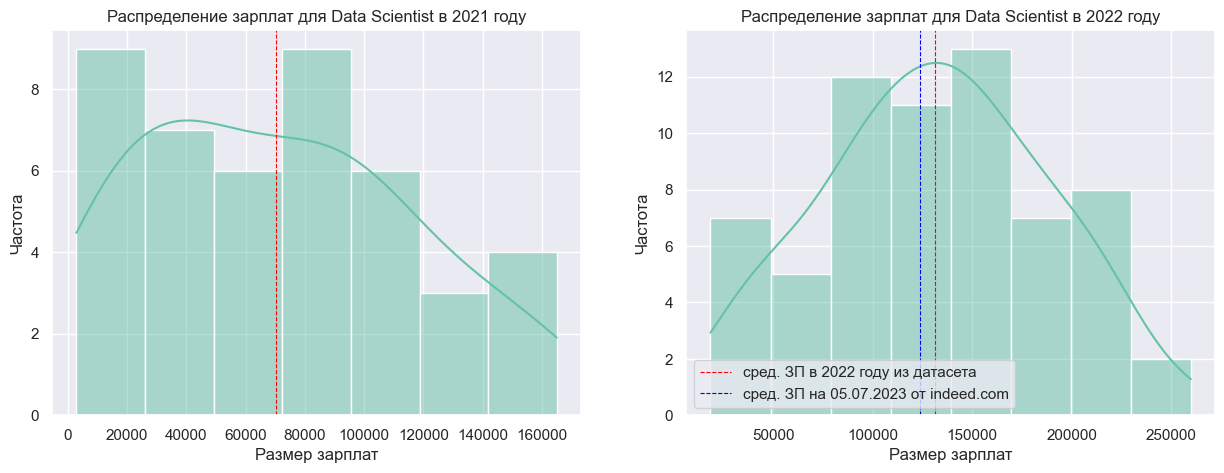

In [11]:
salary_DataScientist_2021 = data.loc[(data['job_title']=='Data Scientist')&(data['work_year']==2021), 'salary_in_usd']
salary_DataScientist_2022 = data.loc[(data['job_title']=='Data Scientist')&(data['work_year']==2022), 'salary_in_usd']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(salary_DataScientist_2021, kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплат', ylabel='Частота')
axes[0].set_title('Распределение зарплат для Data Scientist в 2021 году')
axes[0].axvline(salary_DataScientist_2021.mean(), color='red', linestyle='--', linewidth=0.8)

sns.histplot(salary_DataScientist_2022, kde=True, ax=axes[1])
axes[1].set(xlabel='Размер зарплат', ylabel='Частота')
axes[1].set_title('Распределение зарплат для Data Scientist в 2022 году')
axes[1].axvline(salary_DataScientist_2022.mean(), color='red', linestyle='--', linewidth=0.8, label='сред. ЗП в 2022 году из датасета')
axes[1].axvline(123783, color='blue', linestyle='--', linewidth=0.8, label='сред. ЗП на 05.07.2023 от indeed.com')
axes[1].legend();

plt.show()

Выбросы не наблюдаются. Распределение зарплат близко к нормальному, но пока нет уверенности, поэтому, ниже проверим на нормальность в квантиль-квантиль графике.

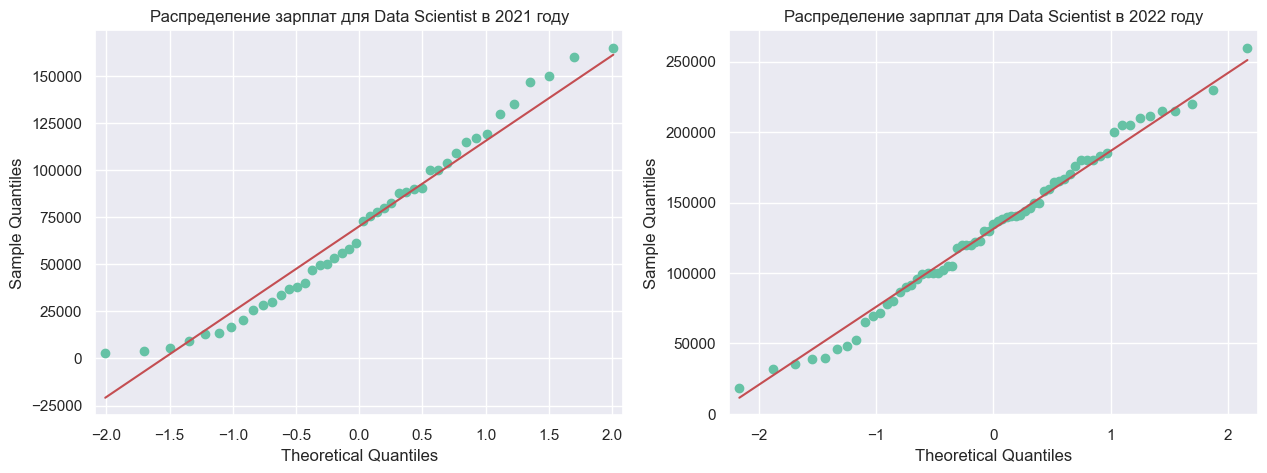

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# задаём параметры квантиль-квантиль графика
sm.qqplot(salary_DataScientist_2021, line='s', ax=axes[0])
axes[0].set_title('Распределение зарплат для Data Scientist в 2021 году')
sm.qqplot(salary_DataScientist_2022, line='s', ax=axes[1])
axes[1].set_title('Распределение зарплат для Data Scientist в 2022 году')

# отображаем квантиль-квантиль график
plt.show()

Все точки, за исключением единиц, лежат вдоль диагонали, данные в выборках распределены нормально. Сравним распределение зарплат с помощью коробчатых диаграм.

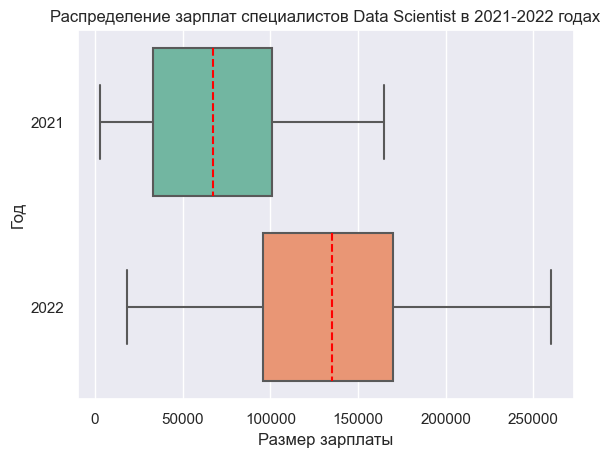

In [13]:
salary_DataScientist_2021_2022 = data[(data['job_title']=='Data Scientist')&(data['work_year'].isin([2021, 2022]))]
ax = sns.boxplot(salary_DataScientist_2021_2022, x='salary_in_usd', y='work_year', orient='h',
 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплат специалистов Data Scientist в 2021-2022 годах')
plt.show()

Найдем основные статистические характеристики зарплат специалистов Data Scientist в 2021 и 2022 годах.

In [14]:
print('Зарплата специалистов Data Scientist в 2021-22 гг.:')
salary_DataScientist_2021_2022.groupby('work_year')['salary_in_usd'].describe().round(2)

Зарплата специалистов Data Scientist в 2021-22 гг.:


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


Визуально зарплата специалистов Data Scientist в 2022 году выросла по сравнению с 2021 годом, примерно в два раза. В следующем разделе мы проведём статистическое тестирование. Попутно здесь сравниваем уровень средней ЗП специалистов Data Scientist в 2022 году, с актуальным на 5 июля 2023 года, который составляет $123783 (согласно источника https://www.indeed.com/career/data-scientist/salaries). Согласно данным уровень ЗП немного упал, следующем разделе мы проведём статистическое тестирование.

###  Зарплата специалистов Data Scientist и Data Engineer в 2022 году

Проверим распределение зарплаты стациалистов Data Engineer в 2022 году.

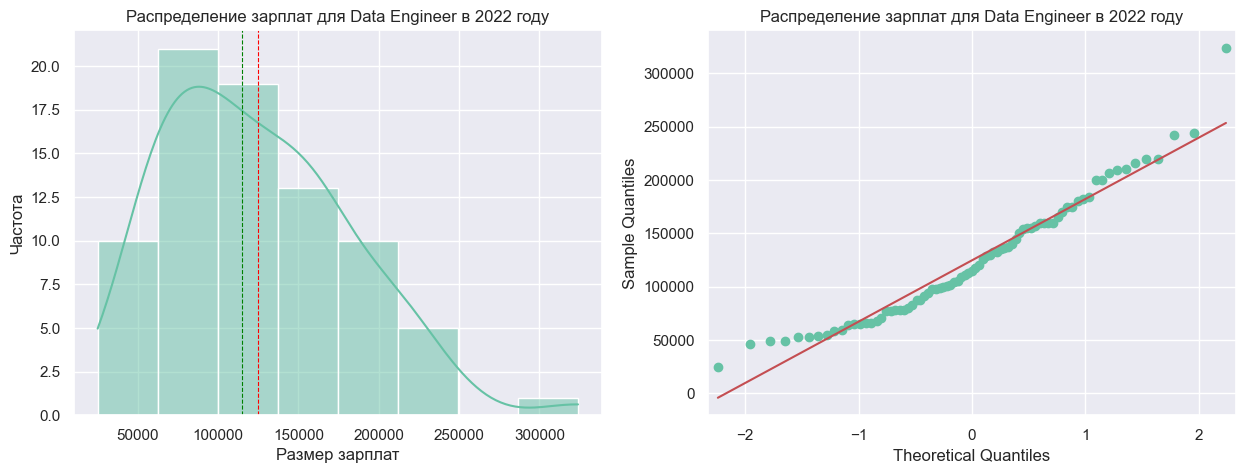

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
salary_DataEngineer_2022 = data.loc[(data['job_title']=='Data Engineer')&(data['work_year']==2022), 'salary_in_usd']

sns.histplot(salary_DataEngineer_2022, kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплат', ylabel='Частота')
axes[0].set_title('Распределение зарплат для Data Engineer в 2022 году')
axes[0].axvline(salary_DataEngineer_2022.mean(), color='red', linestyle='--', linewidth=0.8)
axes[0].axvline(salary_DataEngineer_2022.median(), color='green', linestyle='--', linewidth=0.8)

sm.qqplot(salary_DataEngineer_2022, line='s', ax=axes[1])
axes[1].set_title('Распределение зарплат для Data Engineer в 2022 году')

plt.show()

Распределение отлично от нормального. Избавление от выброса не сделает данное распределение нормальным, т.к есть много других точек, которые лежат недостаточно близко к диагонали.  

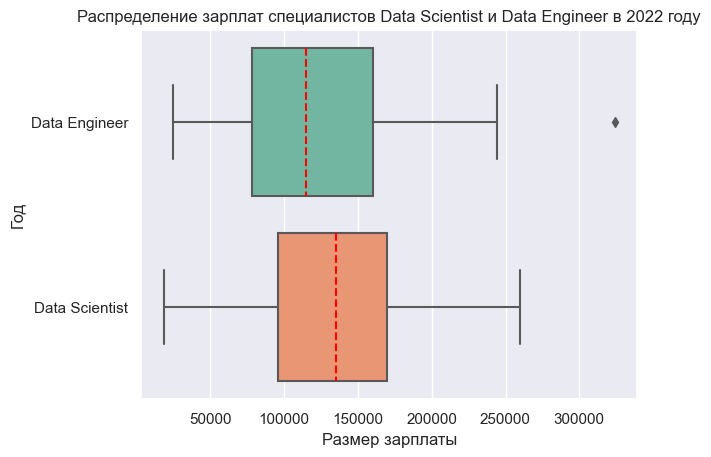

In [16]:
salary_DataScientist_DataEngineer_2022 = data[(data['job_title'].isin(['Data Scientist','Data Engineer']))&(data['work_year']==2022)]
ax = sns.boxplot(salary_DataScientist_DataEngineer_2022,  orient='h', x='salary_in_usd', y='job_title', 
 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплат специалистов Data Scientist и Data Engineer в 2022 году')
plt.show()

Найдем основные статистические характеристики зарплат специалистов Data Scients и Data Engineer в 2022 году.

In [17]:
print('Зарплата специалистов Data Scients и Data Engineer в 2022 году.:')
salary_DataScientist_DataEngineer_2022.groupby('job_title')['salary_in_usd'].describe().round(2)

Зарплата специалистов Data Scients и Data Engineer в 2022 году.:


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


На первый взгляд распределения зарплат для разных специальностей различаются не значительно. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

###  Зарплата специалистов Data Scientist в маленьких, средних и больших компаниях?

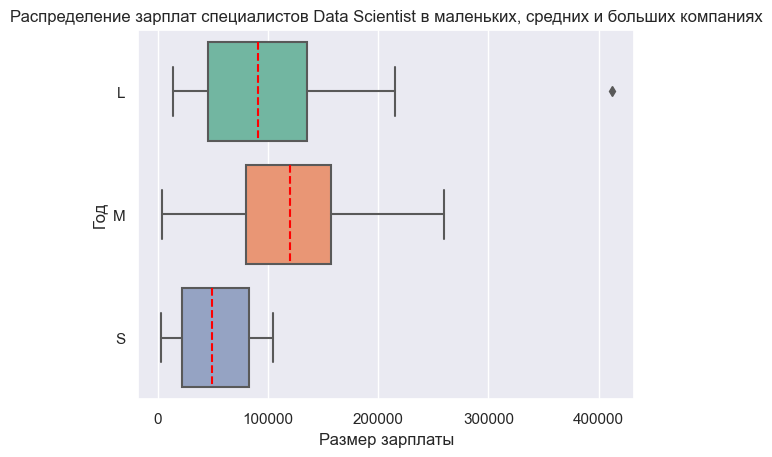

In [18]:
salary_DataScientist = data[(data['job_title']=='Data Scientist')]
ax = sns.boxplot(salary_DataScientist, x='salary_in_usd', y='company_size', orient='h',
 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплат специалистов Data Scientist в маленьких, средних и больших компаниях')
plt.show()

Найдем основные статистические характеристики зарплат специалистов Data Scients в маленьких, средних и больших компаниях.

In [19]:
print('Зарплата специалистов Data Scients в маленьких, средних и больших компаниях:')
salary_DataScientist.groupby('company_size')['salary_in_usd'].describe().round(2)

Зарплата специалистов Data Scients в маленьких, средних и больших компаниях:


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


Распределения зарплат различны для разных размеров компаний. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

###  Соотношение Data Scientist и Data Engineer по размеру компании

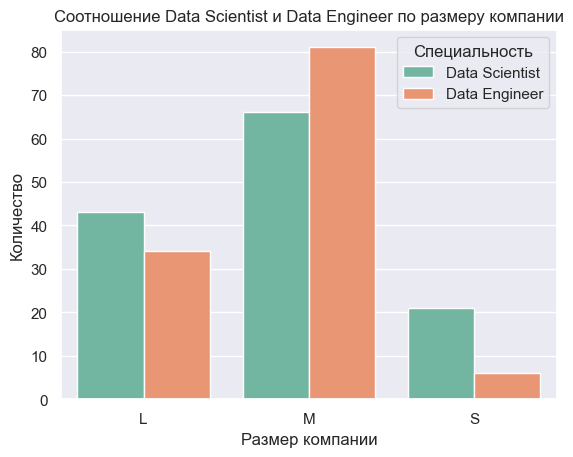

In [20]:
salary_DataScientist_DataEngineer = data[(data['job_title'].isin(['Data Scientist','Data Engineer']))]
ax = sns.countplot(data=salary_DataScientist_DataEngineer, 
                   x=salary_DataScientist_DataEngineer['company_size'], hue='job_title')
ax.set(xlabel='Размер компании', ylabel='Количество')
plt.legend(title='Специальность')
plt.title('Соотношение Data Scientist и Data Engineer по размеру компании')
plt.show()

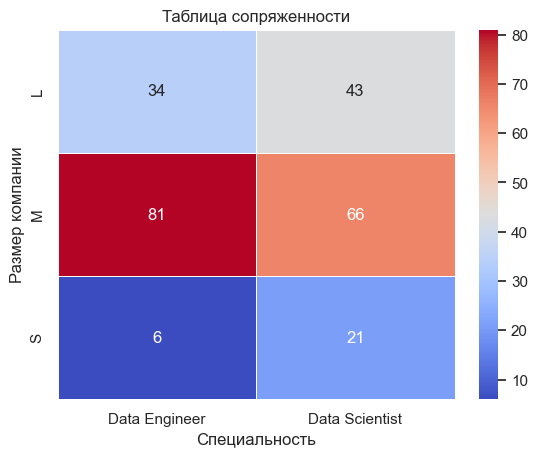

In [21]:
cross_tab_DataScientist_DataEngineer_CompanySize = pd.crosstab(index=salary_DataScientist_DataEngineer['company_size'],
                                                     columns=salary_DataScientist_DataEngineer['job_title'])
ax = sns.heatmap(cross_tab_DataScientist_DataEngineer_CompanySize, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Специальность', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным, специалистов Data Scientist больше в небольших и крупных компаниях, чем специалистов Data Engineer, в средних компаниях наоборот. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных

In [22]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Выросла ли зарплата специалистов Data Scientist в 2022 году по сравнению с 2021 годом?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты специалистов Data Scientist в 2021 году ($μ_1$) статистически больше либо равен размеру зарплаты специалистов Data Scientist в 2022 году ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты специалистов Data Scientist в 2021 году ($μ_1$) статистически меньше, чем размер зарплаты специалистов Data Scientist в 2022 году ($μ_2$).

$$ H_1 : μ_1 < μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [ ]:
# проводим тест Шапиро-Уилка
print('для ЗП Data Scientist 2021 года:')
result = stats.shapiro(salary_DataScientist_2021)
decision_normality(result[1])

print('\nдля ЗП Data Scientist 2022 года:')
result = stats.shapiro(salary_DataScientist_2022)
decision_normality(result[1])

для ЗП Data Scientist 2021 года:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
для ЗП Data Scientist 2022 года:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер размер зарплаты»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет (хотя данные по одной специальности, но разных специалистов, кроме того выборки по длине не равны).
* Признак распределён по нормальному закону? — Да.

Чтобы проверить нашу гипотезу, можно использовать Двухвыборочный t-критерий, чтобы сравнить средние значения в двух независимых группах.

**Проведём тест**

In [24]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_DataScientist_2021, salary_DataScientist_2022)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(salary_DataScientist_2021, salary_DataScientist_2022, alternative='less',
                        equal_var=p>alpha)

decision_hypothesis(p)

Тест на равенство дисперсий
p-value = 0.264
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Зарплата специалистов Data Scientist в 2022 году выросла по сравнению с 2021 годом.

###  В качестве дополнительного исследования, упала ли зарплата специалистов Data Scientist на текущее время по сравнению с 2022 годом?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты специалистов Data Scientist 2022 году ($μ$) статистически  меньше либо равен размеру зарплаты специалистов Data Scientist по состоянию на текущее время: $123783.

$$ H_0 : μ <= 123783$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты специалистов Data Scientist в 2022 году ($μ$) статистически больше, чем размер зарплаты специалистов Data Scientist по состоянию на текущее время: $123783.

$$ H_1 : μ > 123783$$

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер размер зарплаты»? — Количественный.
* Сколько сравниваемых групп? — Одна.
* Признак распределён по нормальному закону? — Да.

Чтобы проверить нашу гипотезу, можно использовать Одновыборочный t-критерий, тобы сравнить среднее значение признака с его заданным значением.

**Проведём тест**

In [25]:
# проводим тест Левена на равенство дисперсий
print('\nТест на равенство среднего с зананным значением')
_, p = stats.ttest_1samp(salary_DataScientist_2022, popmean=123783, alternative='greater')
decision_hypothesis(p)


Тест на равенство среднего с зананным значением
p-value = 0.139
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Зарплата специалистов Data Scientist на текущее время не упала по сравнению с 2022 годом.

### Была ли зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты специалистов Data Scientist в 2022 году ($μ_1$) статистически меньше либо равен размеру зарплаты специалистов Data Engineer в 2022 году ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты специалистов Data Scientist в 2022 году ($μ_1$) статистически больше размера зарплаты специалистов Data Engineer в 2022 году ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [26]:
# проводим тест Шапиро-Уилка
print('для ЗП Data Scientist 2022 года:')
result = stats.shapiro(salary_DataScientist_2021)
decision_normality(result[1])

print('для ЗП Data Engineer 2022 года:')
result = stats.shapiro(salary_DataEngineer_2022)
decision_normality(result[1])

для ЗП Data Scientist 2022 года:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
для ЗП Data Engineer 2022 года:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер размер зарплаты»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет .
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведём тест**

In [27]:
# проводим тест
_, p = stats.mannwhitneyu(salary_DataScientist_2022, salary_DataEngineer_2022, alternative='greater')
decision_hypothesis(p)

p-value = 0.160
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

У нас нет основания пологать, что зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году.

### Различна ли зарплата специалистов Data Scientist в маленьких, средних и больших компаниях?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплаты специалистов Data Scientist не отличается в компаниях разных по размеру: небольшая компания ($μ_1$), средняя компания ($μ_2$), крупная компания ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер зарплаты специалистов Data Scientist отличается в компаниях разных по размеру: небольшая компания ($μ_1$), средняя компания ($μ_2$), крупная компания ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределёны ли признаки нормально.

In [28]:
# значения страховых выплат
salary_DataScientist_CompanySize_S = data.loc[(data['job_title']=='Data Scientist')&(data['company_size']=='S'),
                                               'salary_in_usd']
salary_DataScientist_CompanySize_M = data.loc[(data['job_title']=='Data Scientist')&(data['company_size']=='M'),
                                               'salary_in_usd']
salary_DataScientist_CompanySize_L = data.loc[(data['job_title']=='Data Scientist')&(data['company_size']=='L'),
                                               'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для размера зарплаты специалиста Data Scientist в небольшой компании:')
result = stats.shapiro(salary_DataScientist_CompanySize_S)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в средней компании:')
result = stats.shapiro(salary_DataScientist_CompanySize_M)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в крупной компании:')
result = stats.shapiro(salary_DataScientist_CompanySize_L)
decision_normality(result[1])

Для размера зарплаты специалиста Data Scientist в небольшой компании:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для размера зарплаты специалиста Data Scientist в средней компании:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для размера зарплаты специалиста Data Scientist в крупной компании:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака размер зарплаты? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет (Хотя данные относятся к зарплате по одной специальности, но относятся к разным специалистам).
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [29]:
# проводим тест на различие медиан
_, p = stats.kruskal(salary_DataScientist_CompanySize_S, salary_DataScientist_CompanySize_M,
                      salary_DataScientist_CompanySize_L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Зарплата специалистов Data Scientist в маленьких, средних и больших компаниях различается.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между тем, какую должность занимает специалист, и размером компании в которой он работает нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между тем, какую должность занимает специалист, и размером компании в которой он работает есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Роль, в которой соискатель работал в течение года»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [30]:
# составляем таблицу сопряжённости
cross_tab_DataScientist_DataEngineer_CompanySize

job_title,Data Engineer,Data Scientist
company_size,,
L,34,43
M,81,66
S,6,21


In [31]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_tab_DataScientist_DataEngineer_CompanySize)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между должностью, которую занимает специалист (Data Scientist или Data Engineer), и размером компании в которой он работает (признаки зависимы).

## Дополнительное исследование

###  Соотношение общего объёма работы, выполняемой удалённо по размеру компании

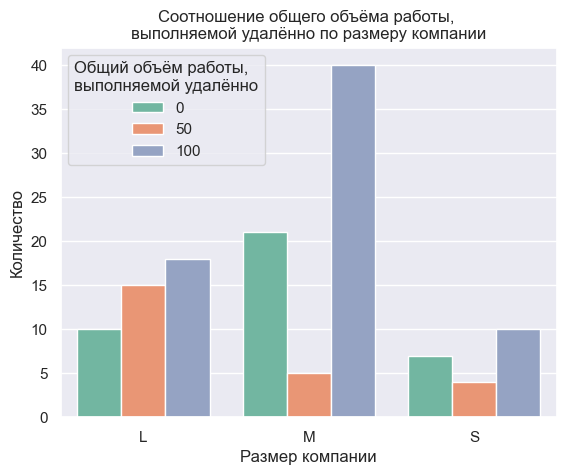

In [32]:
ax = sns.countplot(data=salary_DataScientist, 
                   x=salary_DataScientist['company_size'], hue='remote_ratio')
ax.set(xlabel='Размер компании', ylabel='Количество')
plt.legend(title='Общий объём работы, \nвыполняемой удалённо')
plt.title('Соотношение общего объёма работы, \nвыполняемой удалённо по размеру компании')
plt.show()

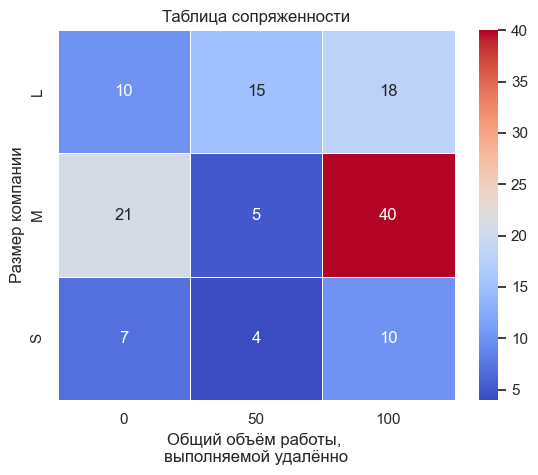

In [33]:
cross_tab_DataScientist_CompanySize_RemoteRatio = pd.crosstab(index=salary_DataScientist['company_size'],
                                                     columns=salary_DataScientist['remote_ratio'])
ax = sns.heatmap(cross_tab_DataScientist_CompanySize_RemoteRatio, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Общий объём работы, \nвыполняемой удалённо', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным, польностью удаленных рабочих мест больше во всех по размеру компаниях, но с разными соотнощениями. Чтобы определить, являются ли эти различия статистически значимыми, а теперь мы проводим статистические тесты.

### Есть ли связь, для специалистов DataScientist, между размером компании и объемом работы выполняемой удаленно?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между тем, какой размер компании, в которой работает специалист Data Scientist и объем работы выполняемой им удаленно нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между тем, какой размер компании, в которой работает специалист Data Scientist и объем работы выполняемой им удаленно есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [34]:
# составляем таблицу сопряжённости
cross_tab_DataScientist_CompanySize_RemoteRatio

remote_ratio,0,50,100
company_size,,,
L,10,15,18
M,21,5,40
S,7,4,10


In [35]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_tab_DataScientist_CompanySize_RemoteRatio)
decision_hypothesis(p)

p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь, для специалистов Data Scientist, между размером компаниии и объемом работы выполняемой удаленно (признаки зависимы).

###  Зависимость зарплаты специалистов Data Scientist от размера компании и объема работы выполняемой удаленно

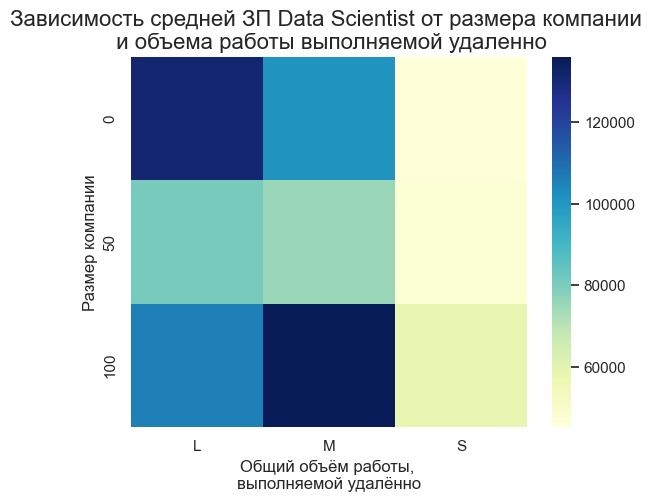

In [36]:
data_salary_mean_pivot = data[(data['job_title']=='Data Scientist')].pivot_table(
    index='remote_ratio',
    columns='company_size',
    values='salary_in_usd',
    aggfunc='mean'
)
data_salary_mean_pivot.columns = data_salary_mean_pivot.columns.astype('string')
ax = sns.heatmap(data=data_salary_mean_pivot, cmap='YlGnBu')
ax.set(xlabel='Общий объём работы, \nвыполняемой удалённо', ylabel='Размер компании')
ax.set_title('Зависимость средней ЗП Data Scientist от размера компании \n и объема работы выполняемой удаленно', fontsize=16);

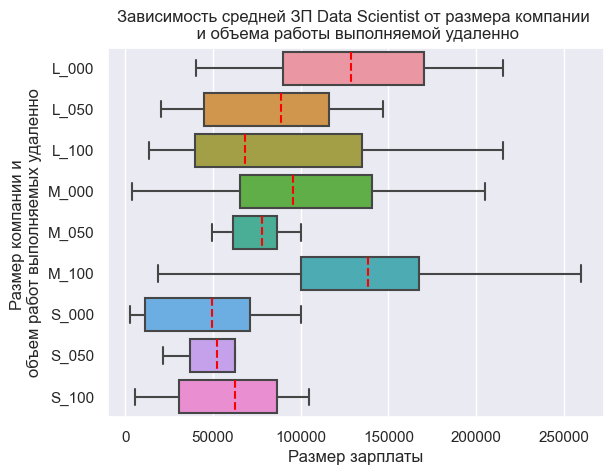

In [37]:
salary_DataScientist= data[(data['job_title']=='Data Scientist')&(data['salary_in_usd']<400000)].copy()
salary_DataScientist['cs_rr'] = salary_DataScientist[['company_size',
         'remote_ratio']].apply(lambda x: x[0]+'_'+'{0:03.0f}'.format(x[1]), axis=1)
salary_DataScientist = salary_DataScientist.sort_values('cs_rr')
ax = sns.boxplot(salary_DataScientist, x='salary_in_usd',  y='cs_rr', orient='h',
 medianprops={"color": "red", "linestyle": '--'})
ax.set(title='Зависимость средней ЗП Data Scientist от размера компании \n и объема работы выполняемой удаленно',
        xlabel='Размер зарплаты', ylabel='Размер компании и \nобъем работ выполняемых удаленно')
plt.show()

Найдем основные статистические характеристики зарплат специалистов Data Scientist в маленьких, средних и больших компаниях при каждом объеме работ выполняемых удаленно.

In [41]:
print('Зарплата специалистов Data Scients в маленьких, средних и больших компаниях при \n каждом объеме работ выполняемых удаленно:')
salary_DataScientist.groupby('cs_rr')['salary_in_usd'].describe().round(2)

Зарплата специалистов Data Scients в маленьких, средних и больших компаниях при 
 каждом объеме работ выполняемых удаленно:


,count,mean,std,min,25%,50%,75%,max
cs_rr,,,,,,,,
L_000,10.0,131166.00,57255.48,40481.0,89874.75,128673.0,170100.0,215300.0
L_050,15.0,80470.00,41330.18,20171.0,44917.50,88654.0,115957.0,147000.0
L_100,17.0,87485.71,59604.61,13400.0,40000.00,68428.0,135000.0,215300.0
M_000,21.0,100580.81,53801.36,4000.0,65438.00,95550.0,140400.0,205300.0
M_050,5.0,75100.00,19969.24,49646.0,61467.00,77684.0,86703.0,100000.0
M_100,40.0,135940.52,55175.73,18442.0,100000.00,138475.0,167750.0,260000.0
S_000,7.0,45293.14,39347.39,2859.0,11183.50,49268.0,71279.0,100000.0
S_050,4.0,47329.50,19654.59,21669.0,37065.00,52461.5,62726.0,62726.0
S_100,10.0,58407.10,34650.16,5679.0,30589.00,62479.0,86428.5,105000.0


Распределения зарплат зависят от объема выполняемых работ удаленно при каждом размере компании. Чтобы определить, являются ли эти различия статистически значимыми, а теперь мы проводим статистические тесты. P.S. Визуально самая большая зарптата в средних по размеру команиях при полностью удаленной работе и в крупных по размеру компаниях при полностью офисной работе.

### Зависит ли зарплата специалистов Data Scientist от размера компании и объема работы выполняемой удаленно?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплаты специалистов Data Scientist не отличается при любых комбинациях размеров компании и объема работ выполняемого удаленно.
 
| Размер компании | Объем работ выполняемых удаленно | Переменная |
| --- | --- | --- |
| крупная компания | удалённой работы нет | $μ_1$ |
| крупная компания | частично удалённая работа | $μ_2$ |
| крупная компания | полностью удалённая работа | $μ_3$ |
| средняя компания | удалённой работы нет | $μ_4$ |
| средняя компания | частично удалённая работа | $μ_5$ |
| средняя компания | полностью удалённая работа | $μ_6$ |
| небольшая компания | удалённой работы нет | $μ_7$ |
| небольшая компания | частично удалённая работа | $μ_8$ |
| небольшая компания | полностью удалённая работа | $μ_9$ |

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 = μ_5 = μ_6 = μ_7 = μ_8 = μ_9$$

*Альтернативная гипотеза*: размер зарплаты специалистов Data Scientist отличается при любых комбинациях размеров компании и объема работ выполняемого удаленно. Названия переменных указанны в Нулевой гипотезе.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 \neq μ_5 \neq μ_6 \neq μ_7 \neq μ_8 \neq μ_9$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределёны ли признаки нормально.

In [39]:
# значения страховых выплат
salary_DataScientist_L_000 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='L_000'), 'salary_in_usd']
salary_DataScientist_L_050 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='L_050'), 'salary_in_usd']
salary_DataScientist_L_100 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='L_100'), 'salary_in_usd']
salary_DataScientist_M_000 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='M_000'), 'salary_in_usd']
salary_DataScientist_M_050 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='M_050'), 'salary_in_usd']
salary_DataScientist_M_100 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='M_100'), 'salary_in_usd']
salary_DataScientist_S_000 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='S_000'), 'salary_in_usd']
salary_DataScientist_S_050 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='S_050'), 'salary_in_usd']
salary_DataScientist_S_100 = salary_DataScientist.loc[(salary_DataScientist['cs_rr']=='S_100'), 'salary_in_usd']

# проводим тесты Шапиро-Уилка
print('Для размера зарплаты специалиста Data Scientist в крупной компании в случае отсутсвия удаленной работы:')
result = stats.shapiro(salary_DataScientist_L_000)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в крупной компании в случае частично удалённой работы:')
result = stats.shapiro(salary_DataScientist_L_050)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в крупной компании в случае полностью удалённой работы:')
result = stats.shapiro(salary_DataScientist_L_100)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в средней компании в случае отсутсвия удаленной работы:')
result = stats.shapiro(salary_DataScientist_M_000)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в средней компании в случае частично удалённой работы:')
result = stats.shapiro(salary_DataScientist_M_050)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в средней компании в случае полностью удалённой работы:')
result = stats.shapiro(salary_DataScientist_M_100)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в небольшой компании в случае отсутсвия удаленной работы:')
result = stats.shapiro(salary_DataScientist_S_000)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в небольшой компании в случае частично удалённой работы:')
result = stats.shapiro(salary_DataScientist_S_050)
decision_normality(result[1])

print('Для размера зарплаты специалиста Data Scientist в небольшой компании в случае полностью удалённой работы:')
result = stats.shapiro(salary_DataScientist_S_100)
decision_normality(result[1])

Для размера зарплаты специалиста Data Scientist в крупной компании в случае отсутсвия удаленной работы:
p-value = 0.787
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для размера зарплаты специалиста Data Scientist в крупной компании в случае частично удалённой работы:
p-value = 0.257
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для размера зарплаты специалиста Data Scientist в крупной компании в случае полностью удалённой работы:
p-value = 0.062
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для размера зарплаты специалиста Data Scientist в средней компании в случае отсутсвия удаленной работы:
p-value = 0.907
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для размера зарплаты специалиста Data Scientist в средней компании в случае частично удалённой работы:
p-value = 0.940
p-значение больше, чем заданный уровен

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака размер зарплаты? — Количественный.
* Сколько сравниваемых групп? — Девять.
* Группы зависимы? — Нет (Хотя данные относятся к зарплате по одной специальности, но относятся к разным специалистам).
* Признак распределён по нормальному закону? — Да. 

Для проверки нашей гипотезы можно использовать Однофакторный дисперсионный анализ (ANOVA) чтобы сравнить средние значения в более чем двух независимых группах.

**Проведём тест**

In [40]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_DataScientist_L_000, salary_DataScientist_L_050, salary_DataScientist_L_100,
                      salary_DataScientist_M_000, salary_DataScientist_M_050, salary_DataScientist_M_100,
                      salary_DataScientist_S_000, salary_DataScientist_S_050, salary_DataScientist_S_100)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест Критерий Краскела — Уоллиса')
    # проводим тест на различие медиан
    print('\nТест на равенство медиан')
    _, p = stats.kruskal(salary_DataScientist_L_000, salary_DataScientist_L_050, salary_DataScientist_L_100,
                      salary_DataScientist_M_000, salary_DataScientist_M_050, salary_DataScientist_M_100,
                      salary_DataScientist_S_000, salary_DataScientist_S_050, salary_DataScientist_S_100)
else:
    print('Дисперсии одинаковы, мы можем использовать параметрический тест ANOVA')
    # проводим тест на сравнение средних в группах
    print('\nТест на равенство средних')
    _, p = stats.f_oneway(salary_DataScientist_L_000, salary_DataScientist_L_050, salary_DataScientist_L_100,
                      salary_DataScientist_M_000, salary_DataScientist_M_050, salary_DataScientist_M_100,
                      salary_DataScientist_S_000, salary_DataScientist_S_050, salary_DataScientist_S_100)

decision_hypothesis(p)

Тест на равенство дисперсий
p-value = 0.313
Дисперсии одинаковы, мы можем использовать параметрический тест ANOVA

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Зарплата специалистов Data Scientist зависит сочетания: размер компании и объем выполняемых работ уданенно.